In [1]:
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:100% !important; } </style>"))

# Simple Linear Regression

We need to read our data from a <tt>csv</tt> file.  The module `csv` offers a number of functions for reading and writing a <tt>csv</tt> file.

In [2]:
import csv

The data we want to read is contained in the <tt>csv</tt> file `'cars.csv'`.  In this file, the first column has the *miles per gallon*, while the *engine displacement* is given in the third column.  We convert *miles per gallon* into *km per liter* and *cubic inches* into *liters*.

In [3]:
with open('cars.csv') as cars_file:
    reader       = csv.reader(cars_file, delimiter=',')
    line_count   = 0
    kpl          = [] # kilometer per litre
    displacement = [] # engin displacement
    for row in reader:
        if line_count != 0:  # skip header of file
            kpl         .append(float(row[0]) * 1.60934 / 3.78541)  
            displacement.append(float(row[2]) * 0.0163871)  
        line_count += 1
print(f'{line_count} lines read')

393 lines read


Now `kpl` is a list of floating point numbers specifying the 
<em style="color:blue;">fuel efficiency</em>, while the list `displacement` 
contains the corresponding <em style="color:blue;">engine displacements</em> 
measured in cubic inches.

In [4]:
kpl[:5]

[7.652571319883447,
 6.3771427665695395,
 7.652571319883447,
 6.802285617674175,
 7.227428468778811]

In [5]:
displacement[:5]

[5.0308397000000005,
 5.735485000000001,
 5.2110978,
 4.981678400000001,
 4.9489042]

The number of data pairs of the form $\langle x, y \rangle$ that we have read is stored in the variable `m`.

In [6]:
m = len(displacement)
m

392

In order to be able to plot the <em style="color:blue;">fuel efficiency</em>
versus the <em style="color:blue;">engine displacement</em> and  we turn the 
lists `displacement` and `mpg` into `numpy` arrays.  This is also very usefull in order to compute the coefficients $\vartheta_0$ and $\vartheta_1$ later.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Since <em style="color:blue;">kilometres per litre</em> is the **inverse** of the fuel consumption, the vector `Y` is defined as follows:

In [8]:
X = np.array(displacement)

In [9]:
Y = np.array([100 / kpl[i] for i in range(m)])

Text(0.5,1,'fuel consumption versus engine displacement')

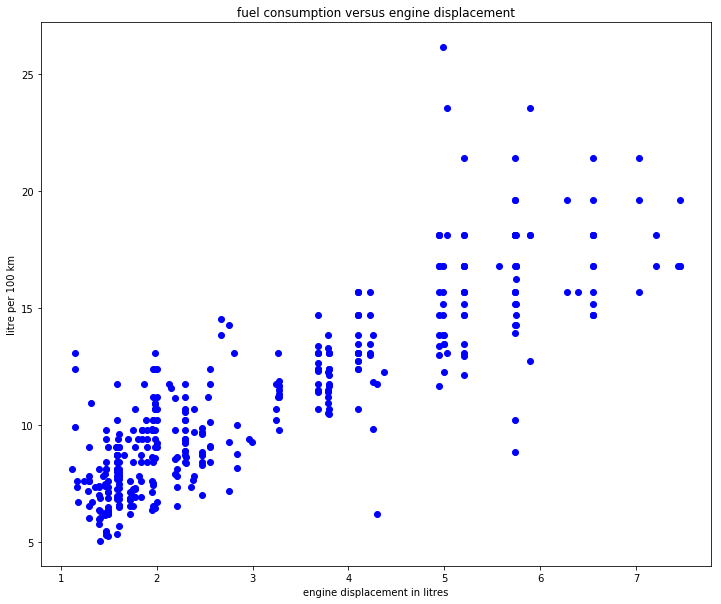

In [10]:
plt.figure(figsize=(12, 10))
plt.scatter(X, Y, c='b') # 'b' is blue color
plt.xlabel('engine displacement in litres')
plt.ylabel('litre per 100 km')
plt.title('fuel consumption versus engine displacement')

We compute the average engine displacement according to the formula:
$$ \bar{\mathbf{x}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m x_i $$ 

In [11]:
xMean = sum(X) / m
xMean

3.1858487179846935

We compute the average fuel consumption according to the formula:
$$ \bar{\mathbf{y}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m y_i $$ 

In [12]:
yMean = sum(Y) / m
yMean

11.248555108422721

The coefficient $\vartheta_1$ is computed according to the formula:
$$ \vartheta_1 = \frac{\sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr) \cdot \bigl(y_i - \bar{\mathbf{y}}\bigr)}{
                       \sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr)^2}  
$$

In [13]:
ϑ1 = sum((X - xMean) * (Y - yMean)) / sum((X - xMean) ** 2)
ϑ1

1.976652063104344

The coefficient $\vartheta_0$ is computed according to the formula:
$$ \vartheta_0 = \bar{\mathbf{y}} - \vartheta_1 \cdot \bar{\mathbf{x}} $$ 

In [14]:
ϑ0 = yMean - ϑ1 * xMean
ϑ0

4.9512406672799472

Let us plot the line $y(x) = ϑ0 + ϑ1 \cdot x$ together with our data:

Text(0.5,1,'Fuel Consumption versus Engine Displacement')

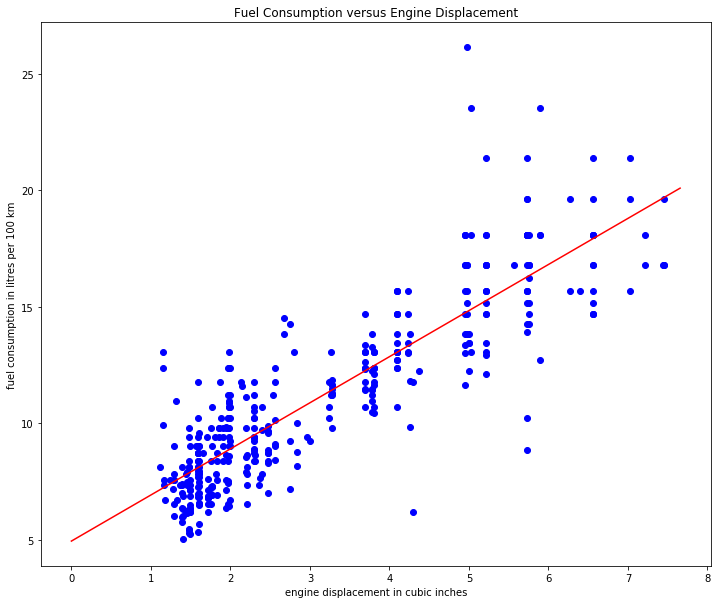

In [15]:
xMax = max(X) + 0.2
plt.figure(figsize=(12, 10))
plt.scatter(X, Y, c='b')
plt.plot([0, xMax], [ϑ0, ϑ0 + ϑ1 * xMax], c='r')
plt.xlabel('engine displacement in cubic inches')
plt.ylabel('fuel consumption in litres per 100 km')
plt.title('Fuel Consumption versus Engine Displacement')

We see there is quite a bit of variation and apparently the engine displacement explains only a part of the fuel consumption.  In order compute the coefficient of determination, i.e. the statistics $R^2$, we first compute the *total sum of squares* `TSS`according to the following formula:
$$ \mathtt{TSS} := \sum\limits_{i=1}^m \bigl(y_i - \bar{\mathbf{y}}\bigr)^2 $$

In [16]:
TSS = sum((Y - yMean) ** 2)
TSS

5989.4136255063877

Next, we compute the *residual sum of squares* `RSS` as follows:
$$ \mathtt{RSS} := \sum\limits_{i=1}^m \bigl(\vartheta_1 \cdot x_i + \vartheta_0 - y_i\bigr)^2 $$
    

In [17]:
RSS = sum((ϑ1 * X + ϑ0 - Y) ** 2)
RSS

1497.0994440627956

Now $R^2$ is calculated via the formula:
$$ R^2 = 1 - \frac{\mathtt{RSS}}{\mathtt{TSS}}$$

In [18]:
R2 = 1 - RSS/TSS
R2

0.75004240186597226

It seems that about $75\%$ of the fuel consumption is explained by the engine displacement.  We can get a better model of the fuel consumption if we use more variables for explaining the fuel consumption.  For example, the weight of a car is also responsible for its fuel consumption.